In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from imutils import paths

In [2]:
from tensorflow.keras.optimizers import Adam

In [3]:
from keras.utils.vis_utils import plot_model

In [4]:
imagePaths = paths.list_images('dataset')
data= []
labels = []

In [5]:
for imagepath in imagePaths:
    image = Image.open(imagepath).convert('RGB')
    image = image.resize((50,50))
    image = np.array(image)/255.
    data.append(image)
    
    labels.append(imagepath.split(os.path.sep)[-2])

In [6]:
data[0]

array([[[0.8627451 , 0.46666667, 0.21176471],
        [0.86666667, 0.40784314, 0.15294118],
        [0.89411765, 0.49411765, 0.17254902],
        ...,
        [0.94901961, 0.8       , 0.21176471],
        [0.94509804, 0.78431373, 0.14901961],
        [0.9254902 , 0.74117647, 0.0745098 ]],

       [[0.84313725, 0.39215686, 0.14901961],
        [0.87058824, 0.4627451 , 0.17647059],
        [0.92156863, 0.61568627, 0.23529412],
        ...,
        [0.94509804, 0.81568627, 0.22745098],
        [0.9372549 , 0.78039216, 0.13333333],
        [0.94509804, 0.78431373, 0.19607843]],

       [[0.87058824, 0.43921569, 0.15686275],
        [0.88627451, 0.49019608, 0.16078431],
        [0.92156863, 0.58823529, 0.15294118],
        ...,
        [0.94901961, 0.81960784, 0.24313725],
        [0.93333333, 0.77647059, 0.10588235],
        [0.94509804, 0.8       , 0.16078431]],

       ...,

       [[0.65098039, 0.50196078, 0.38823529],
        [0.62352941, 0.4745098 , 0.36470588],
        [0.6745098 , 0

In [7]:
print(labels)

['Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Bika Ambon', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'Gudeg', 'G

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
lb= LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(data), np.array(labels), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(len(Y_train))

(604, 50, 50, 3)
(151, 50, 50, 3)
(604, 15)
(151, 15)
604


FIRST TRY

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 15)                1935      
                                                      

In [44]:
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
history= model.fit(X_train, Y_train, epochs=50, validation_data= (X_test, Y_test), verbose=0, validation_split=0.2)

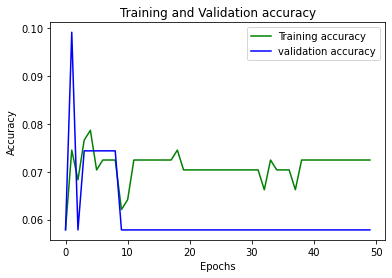

In [46]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

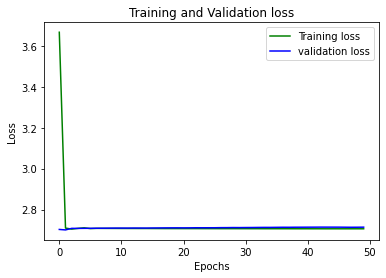

In [47]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3872)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [50]:
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
history= model.fit(X_train, Y_train, epochs=50, validation_data= (X_test, Y_test), verbose=0, validation_split=0.2)

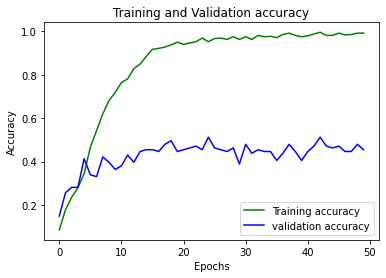

In [52]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

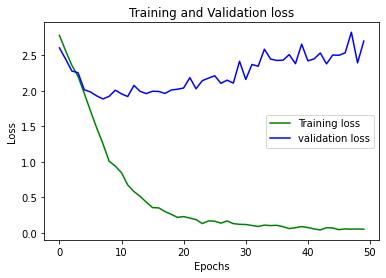

In [53]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 4, 64)        

In [39]:
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history= model.fit(X_train, Y_train, epochs=50, validation_data= (X_test, Y_test), verbose=0, validation_split=0.2)

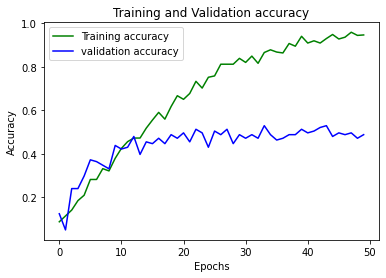

In [40]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

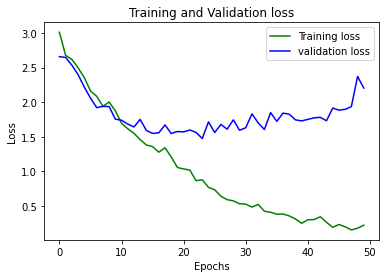

In [41]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 4, 64)        

In [55]:
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history= model.fit(X_train, Y_train, epochs=50, validation_data= (X_test, Y_test), verbose=0, validation_split=0.2)

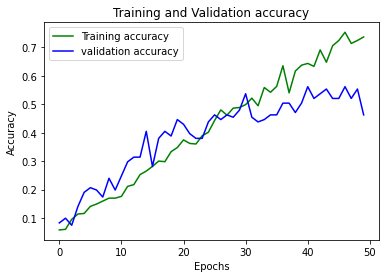

In [56]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

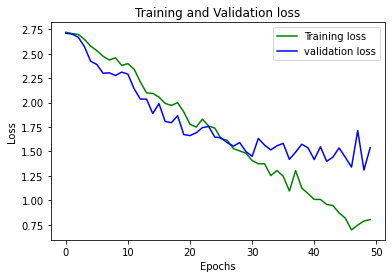

In [57]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
def fit_second_model(x_train, y_train, x_test, y_test, dense):

    # define model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer = 'Adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test), verbose=0, validation_split=0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('dense='+str(dense))
    plt.ylim([0, 20])
    plt.legend()

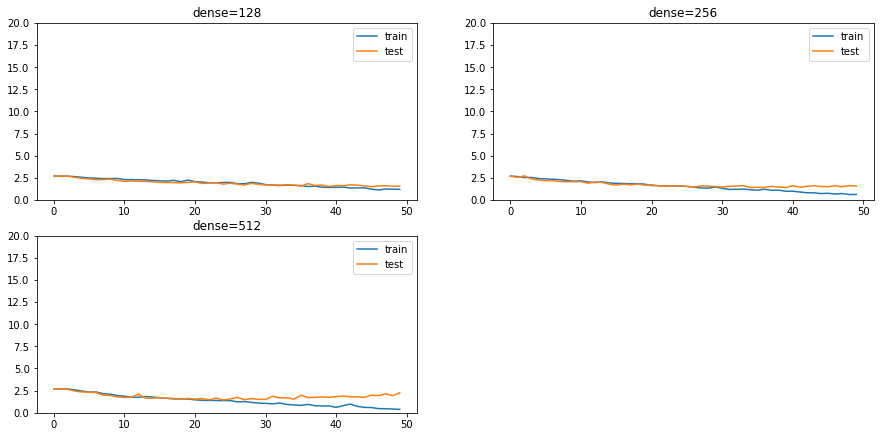

In [60]:
dense = [128, 256, 512]


plt.figure(figsize=(15, 15))
for i in range(len(dense)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, dense[i])

# show learning curves
plt.show()

Second Experiment for epoch

In [1]:
def fit_second_model(x_train, y_train, x_test, y_test, epoch):

    # define model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer = 'Adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=epoch, validation_data= (x_test, y_test), verbose=0, validation_split=0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('epoch='+str(epoch))
    plt.ylim([0, 20])
    plt.legend()

In [ ]:
epoch = [100, 200, 500, 1000, 2000]


plt.figure(figsize=(15, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

Batch Size

In [62]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):

    # define model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer = 'Adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test), verbose=0, batch_size= bs, validation_split=0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('batch size='+str(bs))
    plt.ylim([0, 20])
    plt.legend()

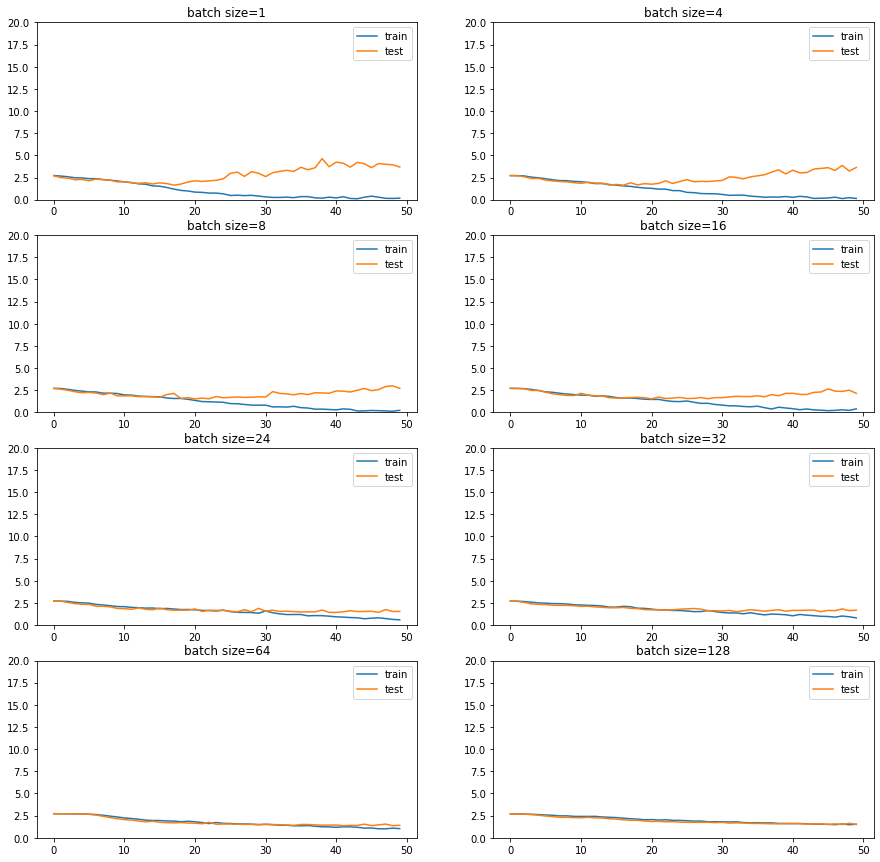

In [63]:
batch_size = [1, 4, 8, 16, 24, 32, 64, 128]


plt.figure(figsize=(15, 15))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

In [64]:
def fit_second_model(x_train, y_train, x_test, y_test, sz):

    # define model
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(sz,sz,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer = 'Adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test), verbose=0, batch_size= 128, validation_split=0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('size='+str(sz))
    plt.ylim([0, 20])
    plt.legend()